<a href="https://colab.research.google.com/github/EvaaVos/Quantum_Computing_Course/blob/main/Qiskit/Unit2_FundamentalsofQuantumAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 5: Quantum query algorithms

In [1]:
%pip install qiskit
%pip install qiskit[visualization]
%pip install qiskit-aer
%pip install galois
from qiskit import *
from qiskit.quantum_info import *
from qiskit.visualization import *
from qiskit_aer import *
from qiskit.result import *
from qiskit.circuit.library import *
import numpy as np
import galois

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=492f16c07ab33c7601213764bdaeba665203a574677c81b53bee76e0c0a0acf3
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Deutsch's algorithm

Function 1 


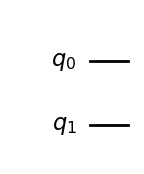

Function 2 


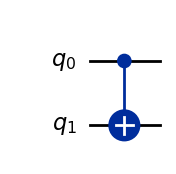

Function 3 


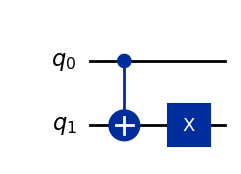

Function 4 


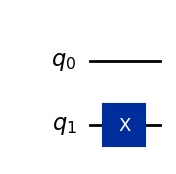

In [3]:
## This function generates a quantum circuit for one of the 4 functions from one bit to one bit
## This creates the oracle box.

def deutsch_function(case: int):

  if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

  function_circuit=QuantumCircuit(2)
  if case in [2,3]:
    function_circuit.cx(0,1)
  if case in [3,4]:
    function_circuit.x(1)
  return function_circuit

print ("Function 1 ")
display(deutsch_function(1).draw(output="mpl"))

print ("Function 2 ")
display(deutsch_function(2).draw(output="mpl"))

print ("Function 3 ")
display(deutsch_function(3).draw(output="mpl"))

print ("Function 4 ")
display(deutsch_function(4).draw(output="mpl"))


##### EXAM

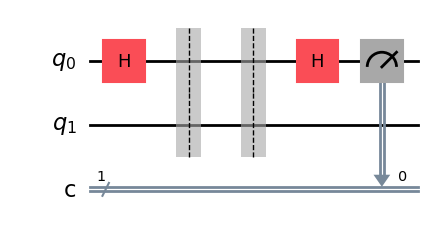

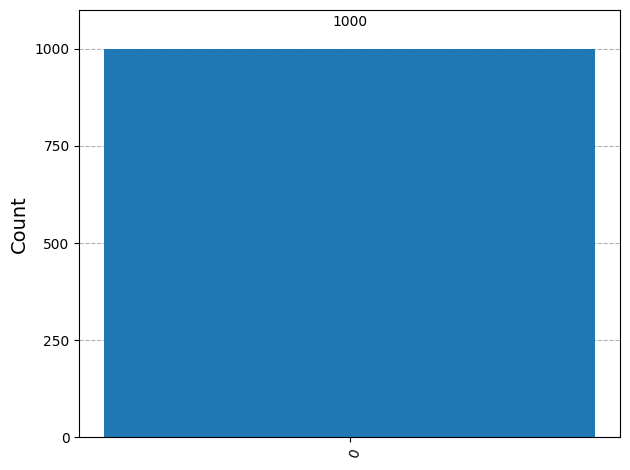

In [14]:
########## EXAM ##############
def original_deutsch_circuit(function: QuantumCircuit):
  n = function.num_qubits - 1 #
  qc=QuantumCircuit(n+1,n)

  qc.h(range(n)) # Handermand gate for all the qubits
  qc.barrier()

  qc.compose(function, inplace=True)

  qc.barrier()
  qc.h(range(n))
  qc.measure(range(n), range(n))

  return qc

display(original_deutsch_circuit(deutsch_function(1)).draw(output="mpl"))

result = AerSimulator().run(original_deutsch_circuit(deutsch_function(1)), shots=1000, memory=True).result()
measurements = result.get_counts()
display(plot_histogram(measurements))


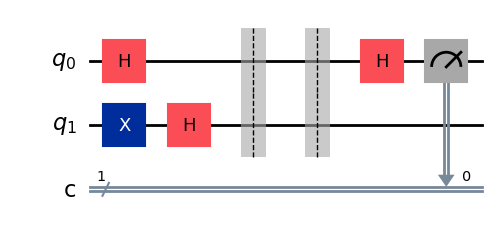

In [ ]:
## Creating the real Deutsch's algorithm

def deutsch_circuit(function: QuantumCircuit):

  n = function.num_qubits - 1 #
  qc=QuantumCircuit(n+1,n)

  qc.x(n) # Select |1> state for qubit2
  qc.h(range(n + 1)) # Handermand gate for all the qubits
  qc.barrier()

  qc.compose(function, inplace=True)

  qc.barrier()
  qc.h(range(n))
  qc.measure(range(n), range(n))

  return qc

display(deutsch_circuit(deutsch_function(1)).draw(output="mpl"))


In [ ]:
## Finally the Deutsch's Algorithm
## This function determined if Deutsch's function is constant or balanced.

def deutsch_algorithm(function: QuantumCircuit):
  qc = deutsch_circuit(function)

  display((qc).draw(output="mpl"))

  result = AerSimulator().run(qc, shots=1, memory=True).result()
  measurements = result.get_memory()
  if measurements[0] == "0":
    return "constant"
  return "balanced"

Function 1 is


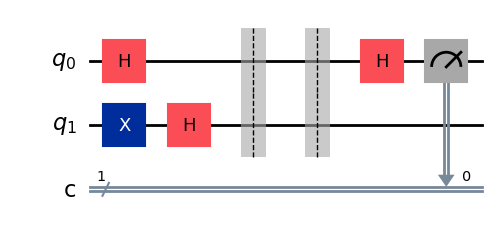

'constant'


Function 2 is


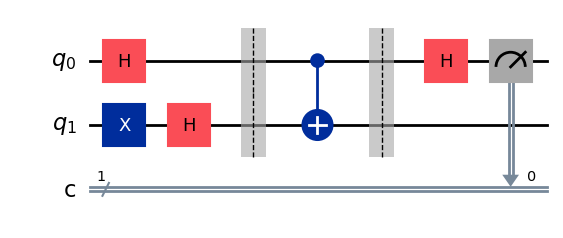

'balanced'


Function 3 is


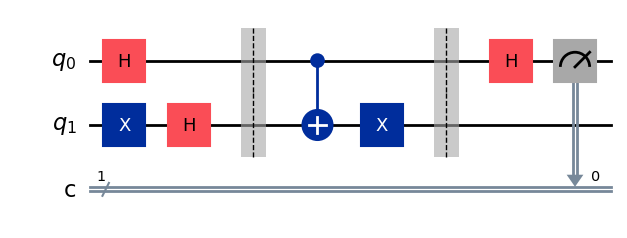

'balanced'


Function 4 is


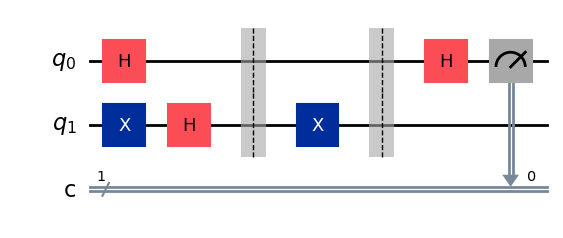

'constant'

In [ ]:
f_deu=deutsch_function(1)
print ("Function 1 is")
display(deutsch_algorithm(f_deu))
print()
f_deu=deutsch_function(2)
print ("Function 2 is")
display(deutsch_algorithm(f_deu))
print()
f_deu=deutsch_function(3)
print ("Function 3 is")
display(deutsch_algorithm(f_deu))
print()
f_deu=deutsch_function(4)
print ("Function 4 is")
display(deutsch_algorithm(f_deu))

The Uf programmed for ChatGPT is balanced


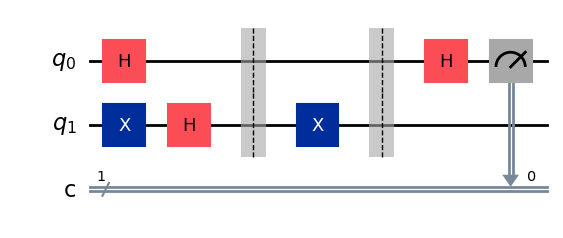

['0']
The function of Uf is constant


In [ ]:
## Now I wan to use the Deutsch's algorithm for a Uf that I have not implement myself!!
## ChatGPT has created a black box for Uf. Any time that the code is run, the Uf is different because of the random choice between the 3 possible functions.

## Uf
def get_secret_uf():
    import random
    oracle = QuantumCircuit(2)

    # Randomly choose between one constant and one balanced function
    choice = random.choice(['constant0', 'constant1', 'balanced'])

    if choice == 'constant0':
        pass  # f(x) = 0 → Uf hace nada
    elif choice == 'constant1':
        oracle.x(1)  # f(x) = 1 → flip always
    elif choice == 'balanced':
        oracle.cx(0, 1)  # f(x) = x

    return oracle, choice  # Solo el oráculo sabe el tipo

## Show the results of the function get_secret_uf
resultado = get_secret_uf()
uf_circuit = resultado[0]
choice = resultado[1]
print ('The Uf programmed for ChatGPT is', choice)
## A cleaner way to do the same is
#uf_circuit, real_type = get_secret_uf()
##uf_circuit will save the first data of the return, in this case oracle. real_type will save the choice.

##### Deutsch's circuit.

secret_qc=QuantumCircuit(2,1)
secret_qc.h(0)
secret_qc.x(1)
secret_qc.h(1)
secret_qc.barrier()

secret_qc.compose(get_secret_uf()[0],inplace=True)

secret_qc.barrier()
secret_qc.h(0)
secret_qc.measure(0,0)

## Plotting the total circuit with the Deutsch's algorithm and also Uf
display((secret_qc).draw(output="mpl"))

## Results
result = AerSimulator().run(secret_qc, shots=1, memory=True).result()
measurements = result.get_memory()
print(measurements)

if measurements[0] == "0":
  print("The function of Uf is constant")
else:
  print("The function of Uf is balanced")


### Deutsch-Jozsa algorithm

In [ ]:
## Generating circuit implementing for a query gate for a random function satisfying the promise for the Deutsch-Jozsa problem.

def DJ_function_oracle(num_qubits):
  circuit=QuantumCircuit(num_qubits + 1)

## np.random.randint(0,2) genera un número aleatorio entero entre 0 (incluido) y 2 (excluido), es decir, solo puede devolver 0 o 1.
## entra en if si np.random.randint es 1 (verdadero)

  if np.random.randint(0,2):
    circuit.x(num_qubits) ## Como solo entra 50% de las veces, cambiamos el estado a |1> el 50%
  if np.random.randint(0,2):
    return circuit

  on_states = np.random.choice(range(2**num_qubits), 2**num_qubits // 2, replace=False)

  def add_cx(circuit, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                circuit.x(qubit)
        return circuit

  for state in on_states:
      circuit.barrier()  # Barriers are added to help visualize how the functions are created.
      circuit = add_cx(circuit, f"{state:0b}")
      circuit.mcx(list(range(num_qubits)), num_qubits)
      circuit = add_cx(circuit, f"{state:0b}")
  circuit.barrier()
  return circuit

#display(DJ_function_oracle(3).draw(output="mpl"))



In [ ]:
## Generating the DJ circuit

def DJ_circuit(function: QuantumCircuit):
    # Compiles a circuit for use in the Deutsch-Jozsa algorithm.

    n = function.num_qubits - 1
    print ('Number of qubits', n)
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.barrier()

    qc.compose(function, inplace=True)  # Adding the oracle function

    qc.barrier()
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [ ]:
## Run the algorithm

def dj_algorithm(function: QuantumCircuit):
    # Determine if a function is constant or balanced.

    qc = DJ_circuit(function)
    display(qc.draw(output="mpl"))

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if "1" in measurements[0]:
        return "balanced"
    return "constant"

Number of qubits 3


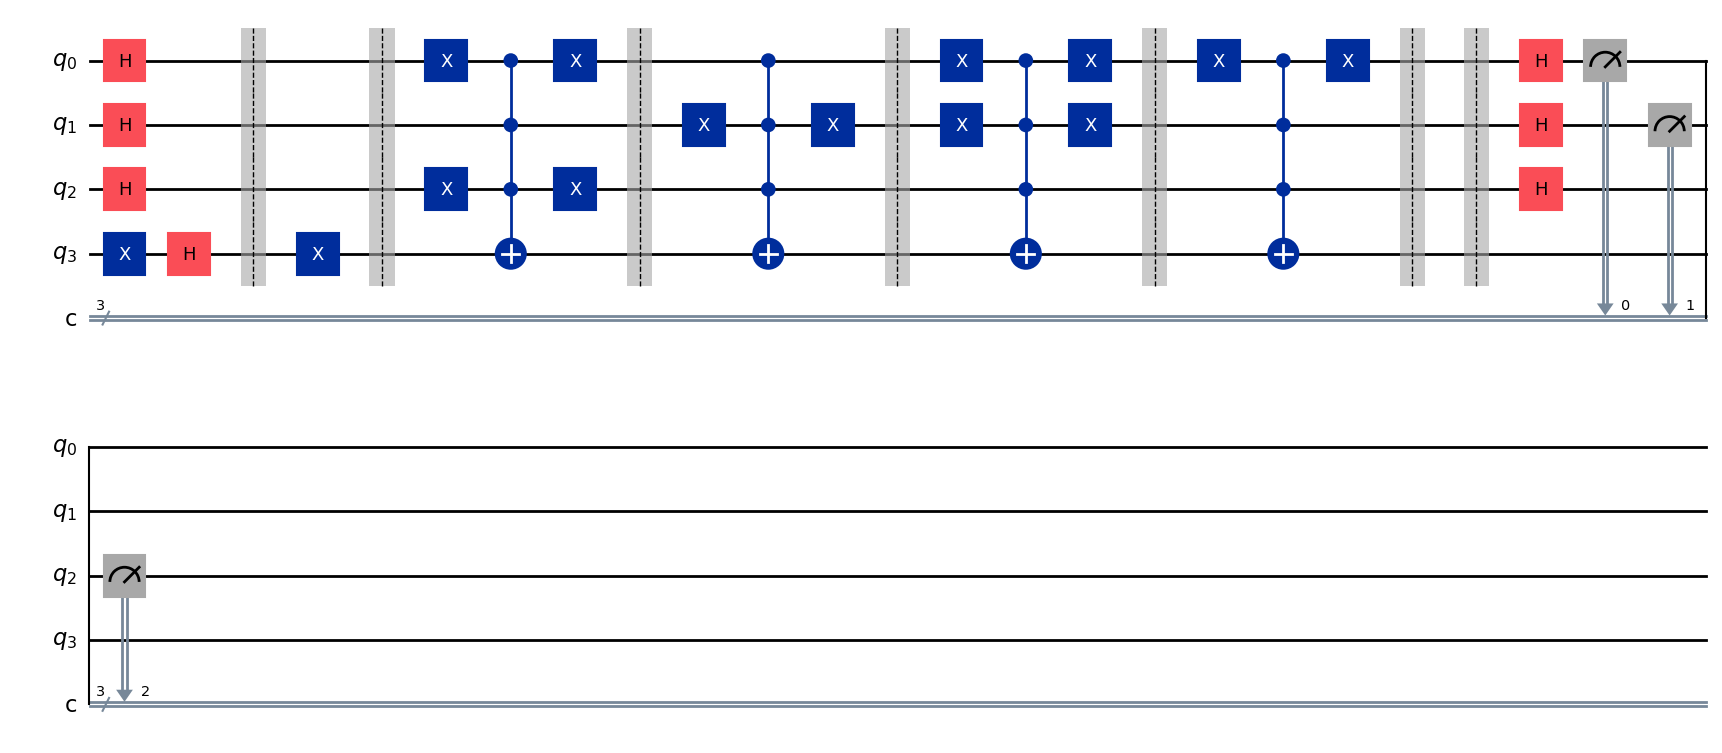

'balanced'

In [ ]:
## Plot the oracle function
#display(DJ_function_oracle(3).draw(output="mpl"))

## Plot the total circiut: DJ + oracle
display(dj_algorithm(DJ_function_oracle(3)))

### Bernstein-Vazirani problem

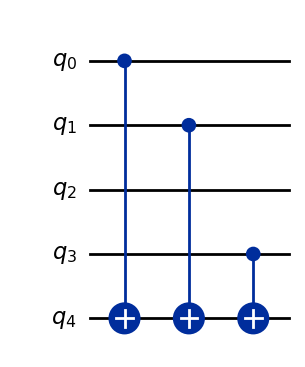

In [ ]:
## Using the previous DJ algorithm, we will solve the BV problem

## First, the function of the problem will be implemented
## Create a quantum circuit implementing a query gate for the Bernstein-Vazirani problem.

def BV_function_oracle(binary_string):

  BV_circuit = QuantumCircuit(len(binary_string)+1)

  for index, bit in enumerate(reversed(binary_string)):
    if bit=="1":
      BV_circuit.cx(index,len(binary_string))

  return BV_circuit

display(BV_function_oracle("1011").draw(output="mpl"))


In [ ]:
## Creating a function that runs the Deutsch-Jozsa circuit

def BV_algorithm(function: QuantumCircuit):
  qc2 = DJ_circuit(function)
  #display(qc2.draw(output="mpl")). ## To see the complete circuit DJ + BV_function_oracle
  result = AerSimulator().run(qc2, shots=1, memory=True).result()
  print('The hidden string is',)
  return result.get_memory()[0]

display(BV_algorithm(BV_function_oracle("1011")))


Number of qubits 4
The hidden string is


'1011'

In [ ]:
## Now, the vector a is built but we dont know it
import random
n = 5  # número de bits
a = [random.randint(0, 1) for _ in range(n)]  # Generar un 'a' secreto al azar
print(a)

## We need to transform the vector a into "XXXXX" for feeding the BV_function_oracle
a_str = ''.join(str(bit) for bit in a)

## Applying the DJ algorithm, we should find out the vector
display(BV_algorithm(BV_function_oracle(a_str)))

[0, 0, 0, 0, 1]
Number of qubits 5
The hidden string is


'00001'

### Simon's algorithm

In [ ]:
## Creating the oracle function for the problem!!

def simon_function(s: str):  ## As input needs the function("XXXXX")

    n = len(s)
    qc_simons = QuantumCircuit(2 * n) ## We need a two set of qubits.

    pi = np.random.permutation(2**n)

    query_gate = np.zeros((4**n, 4**n))
    for x in range(2**n):
        for y in range(2**n):
            z = y ^ pi[min(x, x ^ int(s, 2))]
            query_gate[x + 2**n * z, x + 2**n * y] = 1

    qc_simons.unitary(query_gate, range(2 * n))
    return qc_simons

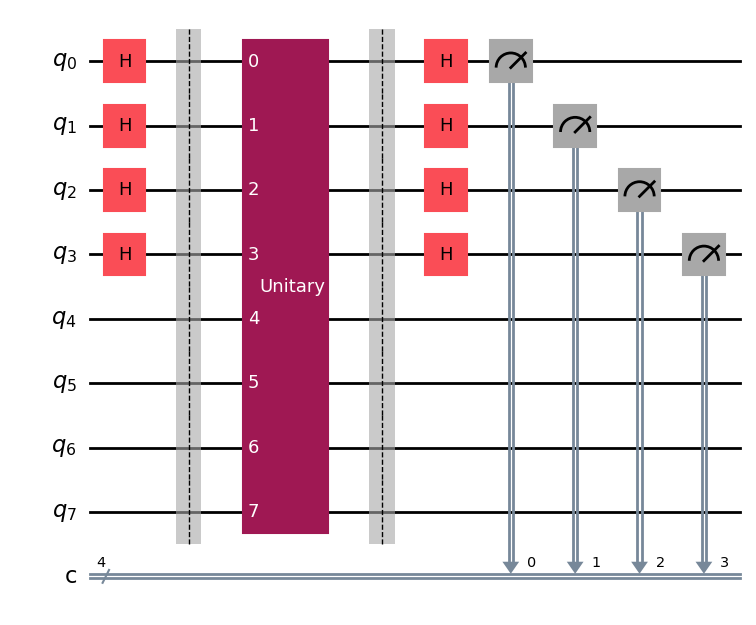

These are the results of the function x string


['0000', '1100', '1100', '0010']

In [ ]:
## Completing the circuit with the Hadanmar gates + simons_function_oracle

def simon_circuit(problem: QuantumCircuit, k: int): ## As input needs the function("XXXXX"), number of shots of measurement

    n = problem.num_qubits // 2

    qc_complete = QuantumCircuit(2 * n, n)
    qc_complete.h(range(n))
    qc_complete.barrier()

    qc_complete.compose(problem, inplace=True) ## Adding the function of the oracle

    qc_complete.barrier()
    qc_complete.h(range(n))
    qc_complete.measure(range(n), range(n))

    display(qc_complete.draw(output="mpl"))

## Mesuarements
    result = AerSimulator().run(qc_complete, shots=k, memory=True).result()
    print ('These are the results of the function x string')
    return result.get_memory()

simon_circuit(simon_function("0001"),4)

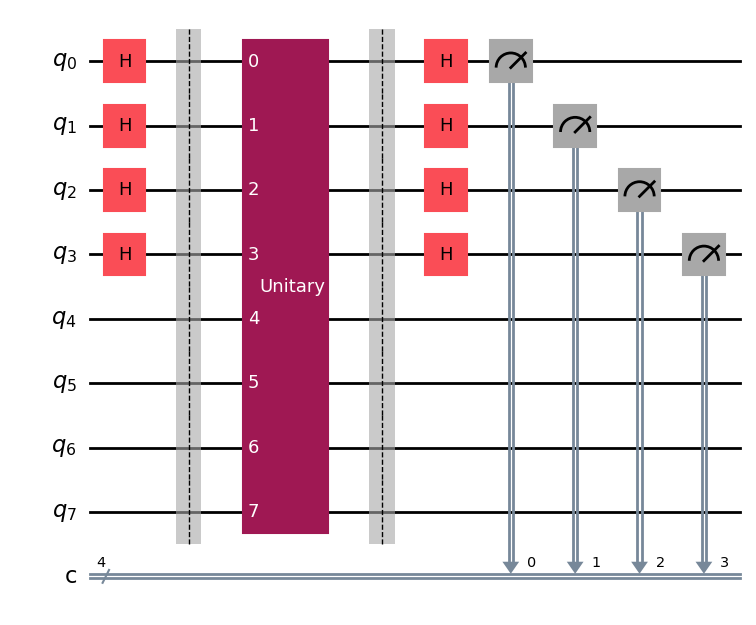

These are the results of the function x string
Guess for hidden string s: 


'1011'

In [ ]:
## Finding the hidden string

def simon_algorithm(problem: QuantumCircuit):

    measurements = simon_circuit(problem, k=problem.num_qubits // 2 + 10)

    # Classical post-processing:

    # 1. Convert measurements of form '11101' to 2D-array of integers
    matrix = np.array([list(bitstring) for bitstring in measurements]).astype(int)

    # 2. Interpret matrix as using arithmetic mod 2, and find null space
    null_space = galois.GF(2)(matrix).null_space()

    # 3. Convert back to a string
    print("Guess for hidden string s: ")
    if len(null_space) == 0:
        # No non-trivial solution; `s` is all-zeros
        return "0" * len(measurements[0])
    return "".join(np.array(null_space[0]).astype(str))


display(simon_algorithm(simon_function("1011")))

00011


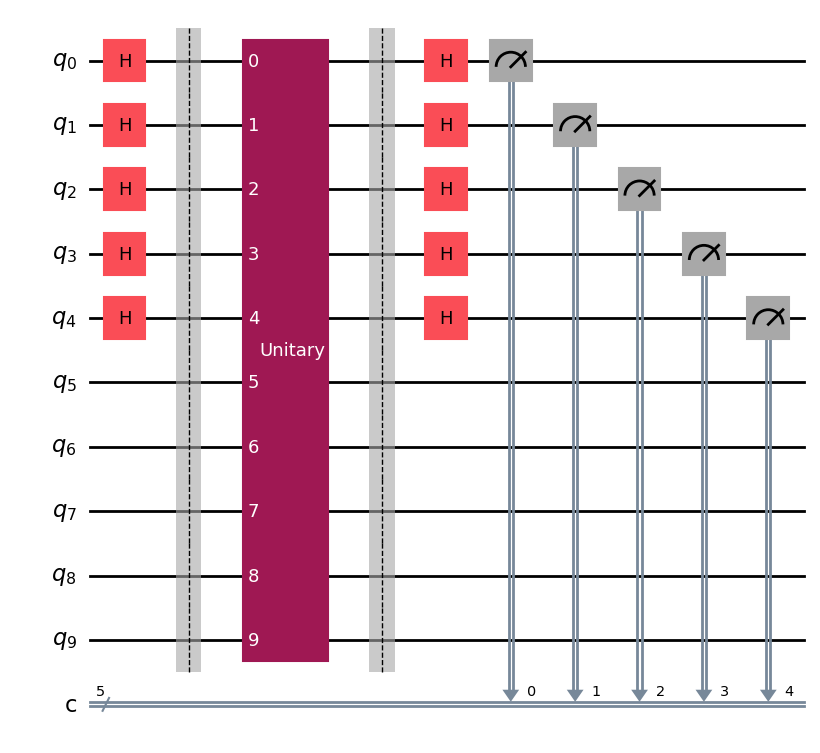

These are the results of the function x string
Guess for hidden string s: 


'00011'

In [ ]:
## Now, we generate a random hidden string

import random
n = 5  # longitud deseada
s = ''.join(random.choice(['0', '1']) for _ in range(n))
#print (s)

## We need to transform the vector a into "XXXXX" for feeding the BV_function_oracle
s_str = ''.join(str(bit) for bit in s)

display(simon_algorithm(simon_function(s_str)))


In [ ]:
####### EXAM ###########



# Lesson 6: Quantum Algorithmic Foundations

### Integer Factorization

In [ ]:
## Factorization with Python

import math
from sympy.ntheory import factorint
import galois

N = 12
display(factorint(N))

M = 3402823669209384634633740743176823109843098343
display(factorint(M))

## RSA1024 never ends!!!
#RSA1024 = 135066410865995223349603216278805969938881475605667027524485143851526510604859533833940287150571909441798207282164471551373680419703964191743046496589274256239341020864383202110372958725762358509643110564073501508187510676594629205563685529475213500852879416377328533906109750544334999811150056977236890927563
#display(factorint(RSA1024))

{2: 2, 3: 1}

{3: 2, 74519450661011221: 1, 5073729280707932631243580787: 1}

### Greatest common divisor (GCD)

In [ ]:
## GCD

N = 4636759690183918349682239573236686632636353319755818421393667064929987310592347460711767784882455889983961546491666129915628431549982893638464243493812487979530329460863532041588297885958272943021122033997933550246447236884738870576045537199814804920281890355275625050796526864093092006894744790739778376848205654332434378295899591539239698896074
M = 5056714874804877864225164843977749374751021379176083540426461360945653967249306494545888621353613218518084414930846655066495767441010526886803458300440345782982127522212209489410315422285463057656809702949608368597012967321172325810519806487247195259818074918082416290513738155834341957254558278151385588990304622183174568167973121179585331770773

display(math.gcd(N, M))
print()
display(math.gcd(N**200 + 1, M**100 + M**2)) ## GCD can be calculated for numbers with thousands of digits in no time.

135066410865995223349603216278805969938881475605667027524485143851526510604859533833940287150571909441798207282164471551373680419703964191743046496589274256239341020864383202110372958725762358509643110564073501508187510676594629205563685529475213500852879416377328533906109750544334999811150056977236890927563

113

### Toffoli gates

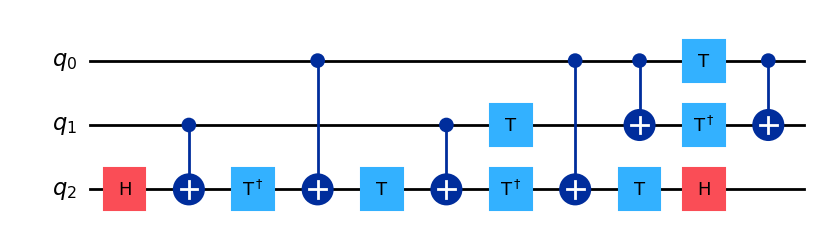

<IPython.core.display.Latex object>

In [ ]:
## Toffoli gates are not included in the default gate set
## Creating Toffoli gate

Toffoli = QuantumCircuit(3)

Toffoli.h(2)
Toffoli.cx(1, 2)
Toffoli.tdg(2)
Toffoli.cx(0, 2)
Toffoli.t(2)
Toffoli.cx(1, 2)
Toffoli.tdg(2)
Toffoli.cx(0, 2)
Toffoli.t(1)
Toffoli.t(2)
Toffoli.cx(0, 1)
Toffoli.t(0)
Toffoli.tdg(1)
Toffoli.h(2)
Toffoli.cx(0, 1)

display(Toffoli.draw(output="mpl"))
display(Operator(Toffoli).draw("latex"))

### Swap Test

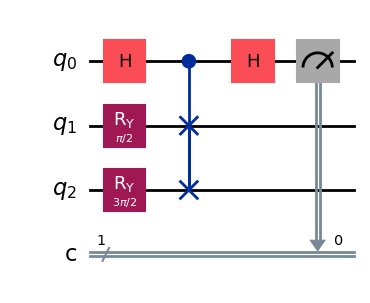

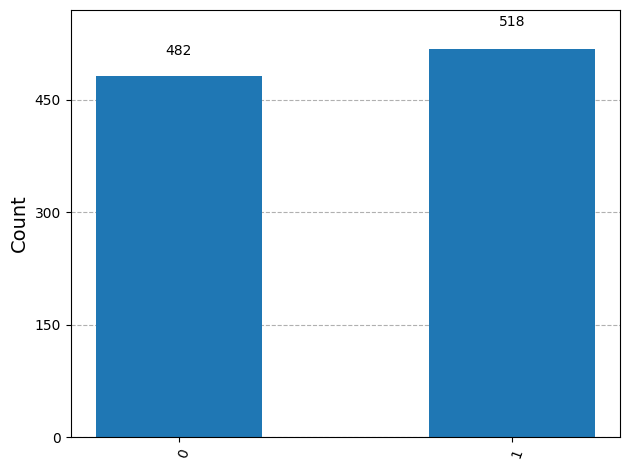

In [77]:
n=3
swap_qc= QuantumCircuit(n,1)


swap_qc.h(0)
swap_qc.ry(2 * np.pi/4, 1)
swap_qc.ry(2 * 3*np.pi/4, 2)
swap_qc.cswap(0,1,2)
swap_qc.h(0)
swap_qc.measure(0,0)

display(swap_qc.draw(output="mpl"))


result = AerSimulator().run(swap_qc, shots=1000, memory=True).result()
statistics=result.get_counts()
display(plot_histogram(statistics))

# Lesson 7: Phase-estimation and factorization

### Spectral statement

In [ ]:
## Theorem statement: A normal matrix can be expressed in terms of a basis vectors (psi) and a complex numbers (lamda) as:

## M = sum lamda(x)|psi><psi|

## We check this theorem in Handarman gate.

from math import pi, cos, sin

print('H =')
display(Operator(HGate()).draw("latex"))
print()

psi1 = Statevector([cos(pi / 8), sin(pi / 8)])
psi2 = Statevector([cos(5*pi / 8), sin(5*pi / 8)])

print('|psi1> =')
display(psi1.draw("latex"))
display(Operator(psi1).draw("latex")) #Operator function returns the outer the product of the vector times its conjugate transpose.
print()

Hadamard = Operator(psi1) - Operator(psi2)
display(Hadamard.draw("latex"))

H =


<IPython.core.display.Latex object>


|psi1> =


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Single-qubit phase-estimation

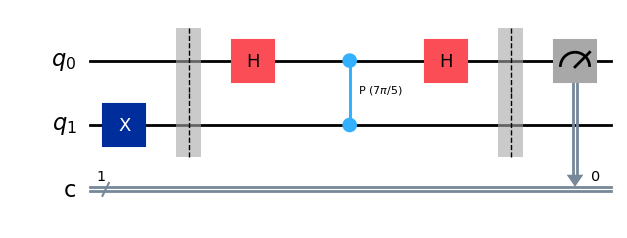

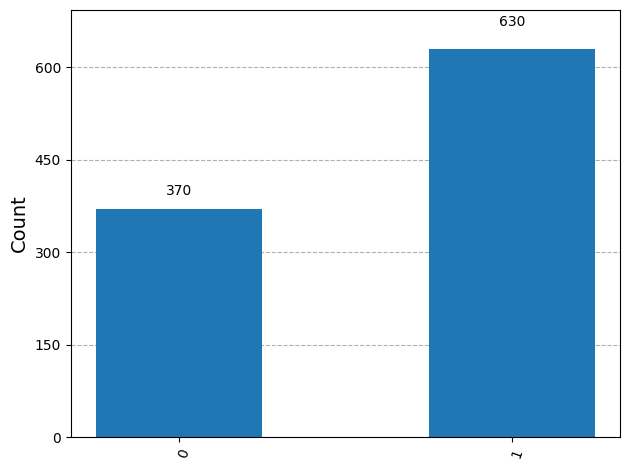

probability |0> cos(pi * 0.7)**2 = 0.3455
probability |1> sin(pi * 0.7)**2 = 0.6545


In [ ]:
## Creating the quantum circuit for phase-estimation.
## For simplicity phase gate for the unitary operation, so the |psi> state will be |1>

theta= 0.7 # Can be any value between 0 and 1

Qcircuit= QuantumCircuit(2,1)

Qcircuit.x(1)
Qcircuit.barrier()

Qcircuit.h(0)

Qcircuit.cp(2 * pi * theta, 0, 1) # Controlled-U gate

Qcircuit.h(0)
Qcircuit.barrier()

Qcircuit.measure(0, 0)

display(Qcircuit.draw(output="mpl"))

result = AerSimulator().run(Qcircuit, shots = 1000).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

print(f"probability |0> cos(pi * {theta})**2 = {cos(pi * theta) ** 2:.4f}")
print(f"probability |1> sin(pi * {theta})**2 = {sin(pi * theta) ** 2:.4f}")

### Two qubit phase-estimation

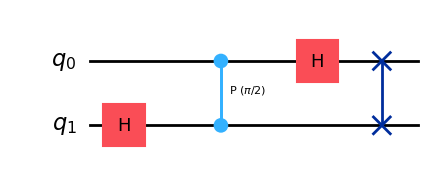

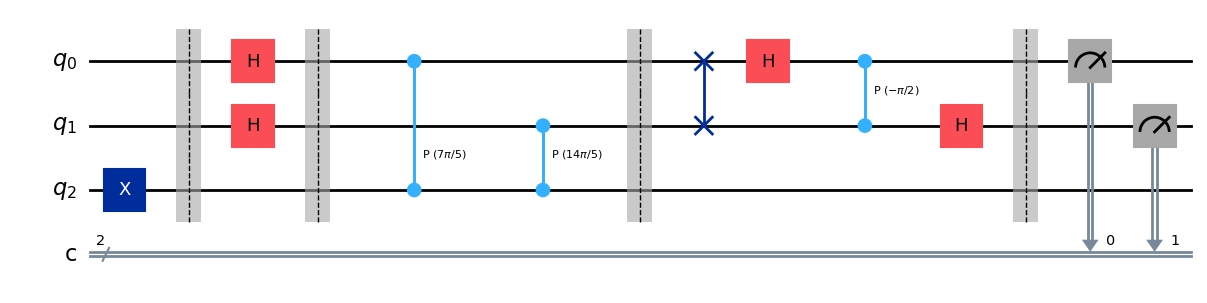

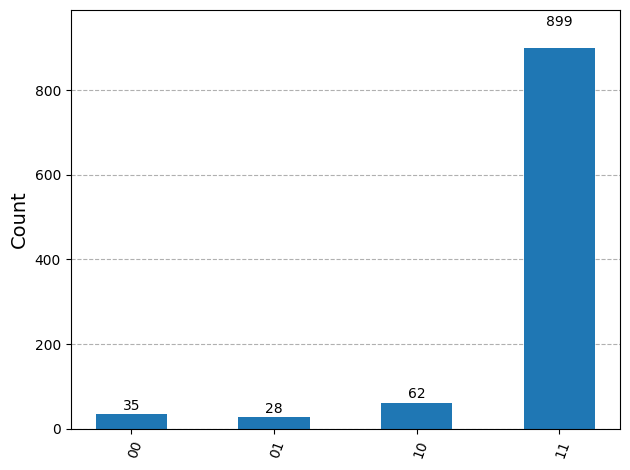

In [ ]:
theta=0.7

Qcircuit2=QuantumCircuit(3,2)

# Prepare the eigenvector
Qcircuit2.x(2)
Qcircuit2.barrier()

Qcircuit2.h(0)
Qcircuit2.h(1)
Qcircuit2.barrier()

Qcircuit2.cp(2*pi*tetha,0,2)
Qcircuit2.cp(2*pi*(2*tetha),1,2) ## Two controlled-U are applied for this qubit.
Qcircuit2.barrier()

## Inverse QFT4
Qcircuit2.swap(0, 1)
Qcircuit2.h(0)
Qcircuit2.cp(-pi / 2, 0, 1)
Qcircuit2.h(1)

## QFT is implemented in Qiskit as
from qiskit.circuit.library import QFT
display(QFT(2).decompose().draw(output="mpl"))

Qcircuit2.barrier()
Qcircuit2.measure(0,0)
Qcircuit2.measure(1,1)

display(Qcircuit2.draw(output="mpl"))

result = AerSimulator().run(Qcircuit2).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

### Generalizing to many qubits

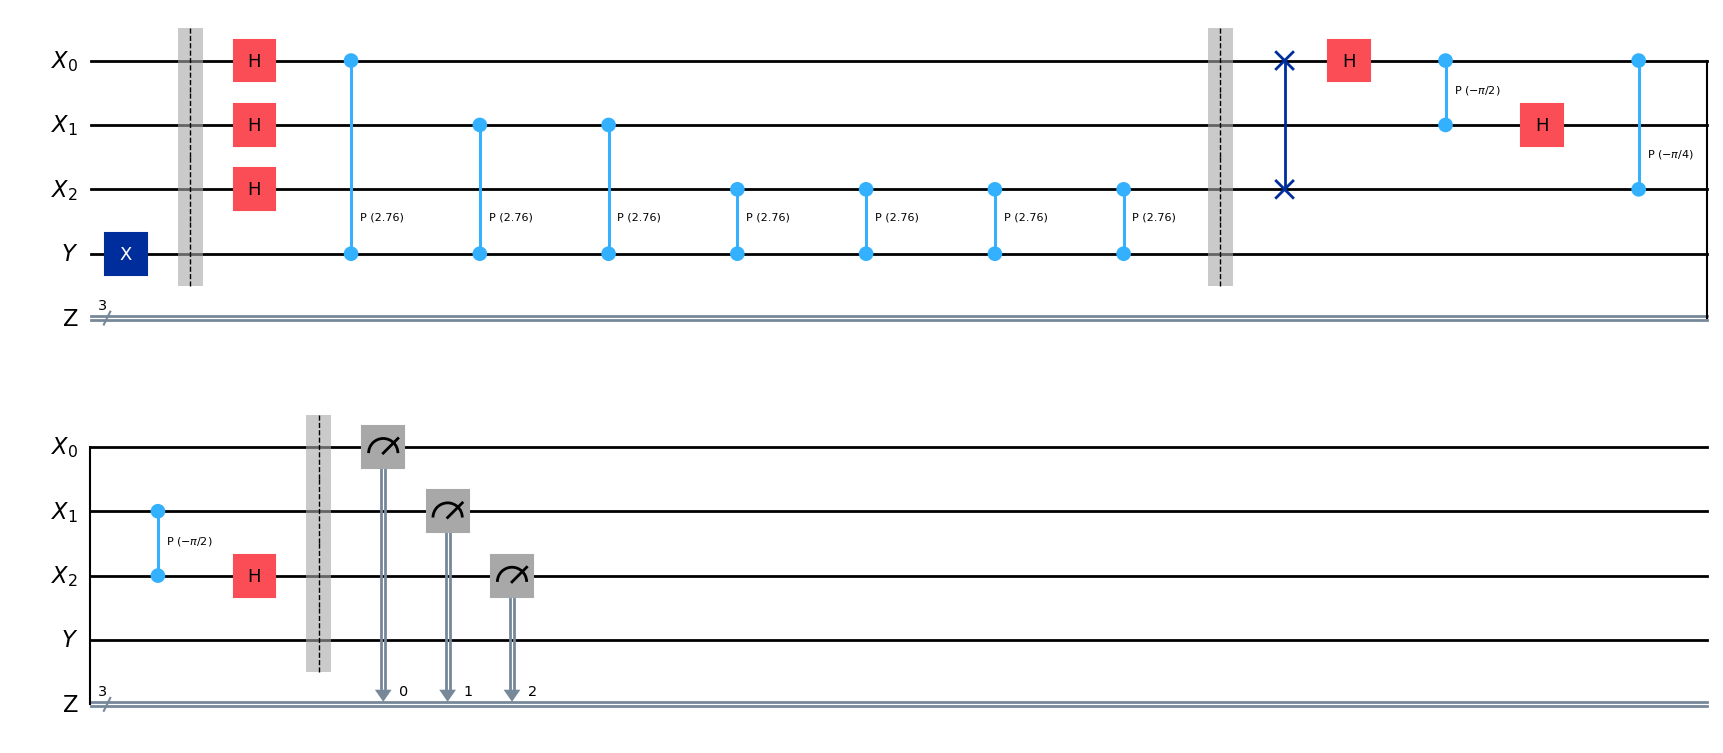

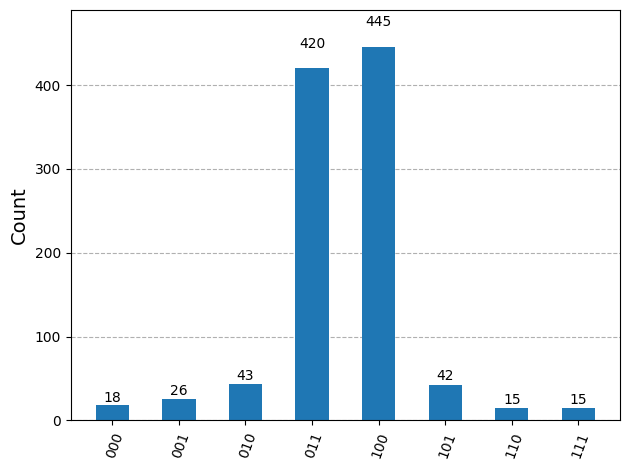

String most probable output: 5
Estimated theta: 0.5


In [ ]:
theta = 0.44
m = 3  # Number of control qubits

control=QuantumRegister(m, name="X")
target=QuantumRegister(1, name="Y")
output=ClassicalRegister(m, name="Z")

Qcircuit_m = QuantumCircuit(control,target,output)

## Prepare the eigenvector
Qcircuit_m.x(target)
Qcircuit_m.barrier()

# Perform phase estimation
for index, qubit in enumerate(control):
    Qcircuit_m.h(qubit)
    for _ in range(2**index):
        Qcircuit_m.cp(2 * pi * theta, qubit, target)
Qcircuit_m.barrier()

# Perform the inverse quantum Fourier transform
Qcircuit_m.compose(
    QFT(m, inverse=True).decompose(),
    inplace=True
)
Qcircuit_m.barrier()

# Measure everything
Qcircuit_m.measure(range(m), range(m))

display(Qcircuit_m.draw(output="mpl"))

result = AerSimulator().run(Qcircuit_m).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

most_probable = int(max(statistics, key=statistics.get),2)

print(f"String most probable output: {most_probable+1}")
print(f"Estimated theta: {most_probable/2**m}")

### Shor's Algorithm